In [36]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

from warnings import filterwarnings
filterwarnings('ignore')

Loading Extracted Data

In [37]:
data = pd.read_csv('IAS.csv')
dcopy = data.copy()
data.head()

,ID,Name,Gender,DOB,Date of Appointment,Source of Recruitment,Allotment Year,Cadre,Qual 1,Qual 2,Spec 1,Spec 2,Domicile,Current Post,Department,Location,With Effect From Date,Pay Level
0,007600,Shri Pradip Kumar Tripathi,Male,1964-06-18,1987-08-24,RR,1987,UT,B.E.,M.Tech,Civil Engg,Structural Engg,Uttar Pradesh,Secretary (Coordination),Cabinet Secretariat,New Delhi,2022-02-05,Level 17
1,018400,Shri Naresh Kumar,Male,1963-11-18,1987-08-24,RR,1987,UT,B.E.,M.B.A.,Mech. Engg.,Public Admn,Delhi,Chief Secretary,Govt. of National capital Territory of Delhi (...,Delhi,2022-04-21,Level 17
2,018800,Shri Chetan Bhushan Sanghi,Male,1965-06-26,1988-08-25,RR,1988,UT,M.A.,B.Sc.,Public Policy,Hons,Andhra Pradesh,Financial Commissioner,Govt. of National capital Territory of Delhi (...,New Delhi,2021-01-04,Level 17
3,019002,Dr.(Ms.) Renu Sharma,Female,1964-10-19,1988-08-25,RR,1988,UT,M.Phil,Ph.D.,Political Sc.,Political Sc.,Delhi,Chief Secretary to Government of Mizoram,NaN,Aizawl (Mizoram),2021-02-11,Level 17
4,008200,Shri Atal Dulloo,Male,1966-10-24,1989-08-21,RR,1989,UT,B.Tech,NaN,Civil Engg,NaN,Jammu & Kashmir,Chief Secretary,NaN,Jammu & Kashmir,2023-01-12,Level 17


In [38]:
print(f'Shape: {data.shape}')

Shape: (5542, 18)


Information of Features

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5542 entries, 0 to 5541
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     5542 non-null   object
 1   Name                   5542 non-null   object
 2   Gender                 5542 non-null   object
 3   DOB                    5542 non-null   object
 4   Date of Appointment    5542 non-null   object
 5   Source of Recruitment  5542 non-null   object
 6   Allotment Year         5542 non-null   object
 7   Cadre                  5542 non-null   object
 8   Qual 1                 5537 non-null   object
 9   Qual 2                 1760 non-null   object
 10  Spec 1                 2983 non-null   object
 11  Spec 2                 1091 non-null   object
 12  Domicile               5026 non-null   object
 13  Current Post           5535 non-null   object
 14  Department             3482 non-null   object
 15  Location             

Getting Value Counts of Features

In [40]:
data['Gender'].value_counts()

Male      3769
Female    1773
Name: Gender, dtype: int64

In [41]:
data['Pay Level'].value_counts()

Level 12    1228
Level 11    1177
Level 14     855
Level 13     851
Level 10     660
Level 15     416
Level 17     353
Level 18       1
N.A.           1
Name: Pay Level, dtype: int64

Removing null values from target variable

In [42]:
pay_na = data['Pay Level'].str.strip() == 'N.A.'
ind = data[pay_na].index

data = data.drop(ind)
dcopy = data.copy()

print(f'Number of records dropped:  {len(ind)}')

Number of records dropped:  1


In [43]:
data['Cadre'].value_counts()


UP    574
UT    412
MP    393
MH    346
TN    333
WB    303
KN    273
RJ    262
GJ    260
BH    244
AM    213
AP    210
JH    192
PB    191
OR    189
HY    174
TG    169
CG    169
KL    152
HP    113
UD    111
MN     88
TR     77
NL     58
SK     35
Name: Cadre, dtype: int64

In [44]:
data['Source of Recruitment'].value_counts()

RR         3986
SCS        1419
Non-SCS     136
Name: Source of Recruitment, dtype: int64

Deriving Age, Service Tenure (Overall) and Current Posting Tenure

In [45]:

def get_curr_tenure(x):

    if type(x) == pd._libs.tslibs.nattype.NaTType:
        return np.nan
    else:
        x = np.floor((x.components.days) / 365).astype('int')
        if x < 0:  return np.nan
        else:  return x


data['Date of Appointment'] = pd.to_datetime(data['Date of Appointment'])
date_of_appointment = data['Date of Appointment']
data['Allotment Year'] = date_of_appointment.dt.year.astype('int')

data['DOB'] = pd.to_datetime(data['DOB'])
dob = data['DOB']

data['With Effect From Date'] = pd.to_datetime(data['With Effect From Date'])
wef_date = data['With Effect From Date']

today = pd.Timestamp.today().to_datetime64()

age = (today - dob)
service_tenure = (today - date_of_appointment)
current_tenure = (today - wef_date)

service_tenure = service_tenure.apply(lambda x: np.floor((x.components.days) / 365).astype('int'))
age = age.apply(lambda x: np.floor((x.components.days) / 365).astype('int'))
current_tenure = current_tenure.apply(get_curr_tenure)


In [46]:
data['Date of Appointment'].value_counts()

2021-05-12    179
2022-08-29    179
2020-12-10    167
2013-02-09    167
2023-07-31    151
             ... 
1989-08-29      1
2011-04-29      1
2019-11-04      1
2019-08-28      1
2023-12-06      1
Name: Date of Appointment, Length: 485, dtype: int64

In [47]:
data['With Effect From Date'].dt.year.value_counts()
data['With Effect From Date'].value_counts()

2024-01-01    83
2023-03-04    55
2023-10-16    53
2023-05-22    52
2023-10-04    47
              ..
2019-03-01     1
2023-03-06     1
2016-01-12     1
2022-07-20     1
2022-05-04     1
Name: With Effect From Date, Length: 1094, dtype: int64

## Handling Missing Values

Percentage of null values in each column

In [48]:
np.round(data.isnull().mean()*100,2)

ID                        0.00
Name                      0.00
Gender                    0.00
DOB                       0.00
Date of Appointment       0.00
Source of Recruitment     0.00
Allotment Year            0.00
Cadre                     0.00
Qual 1                    0.09
Qual 2                   68.24
Spec 1                   46.16
Spec 2                   80.31
Domicile                  9.31
Current Post              0.13
Department               37.16
Location                  3.56
With Effect From Date     4.26
Pay Level                 0.00
dtype: float64

Visualizing null values in each feature

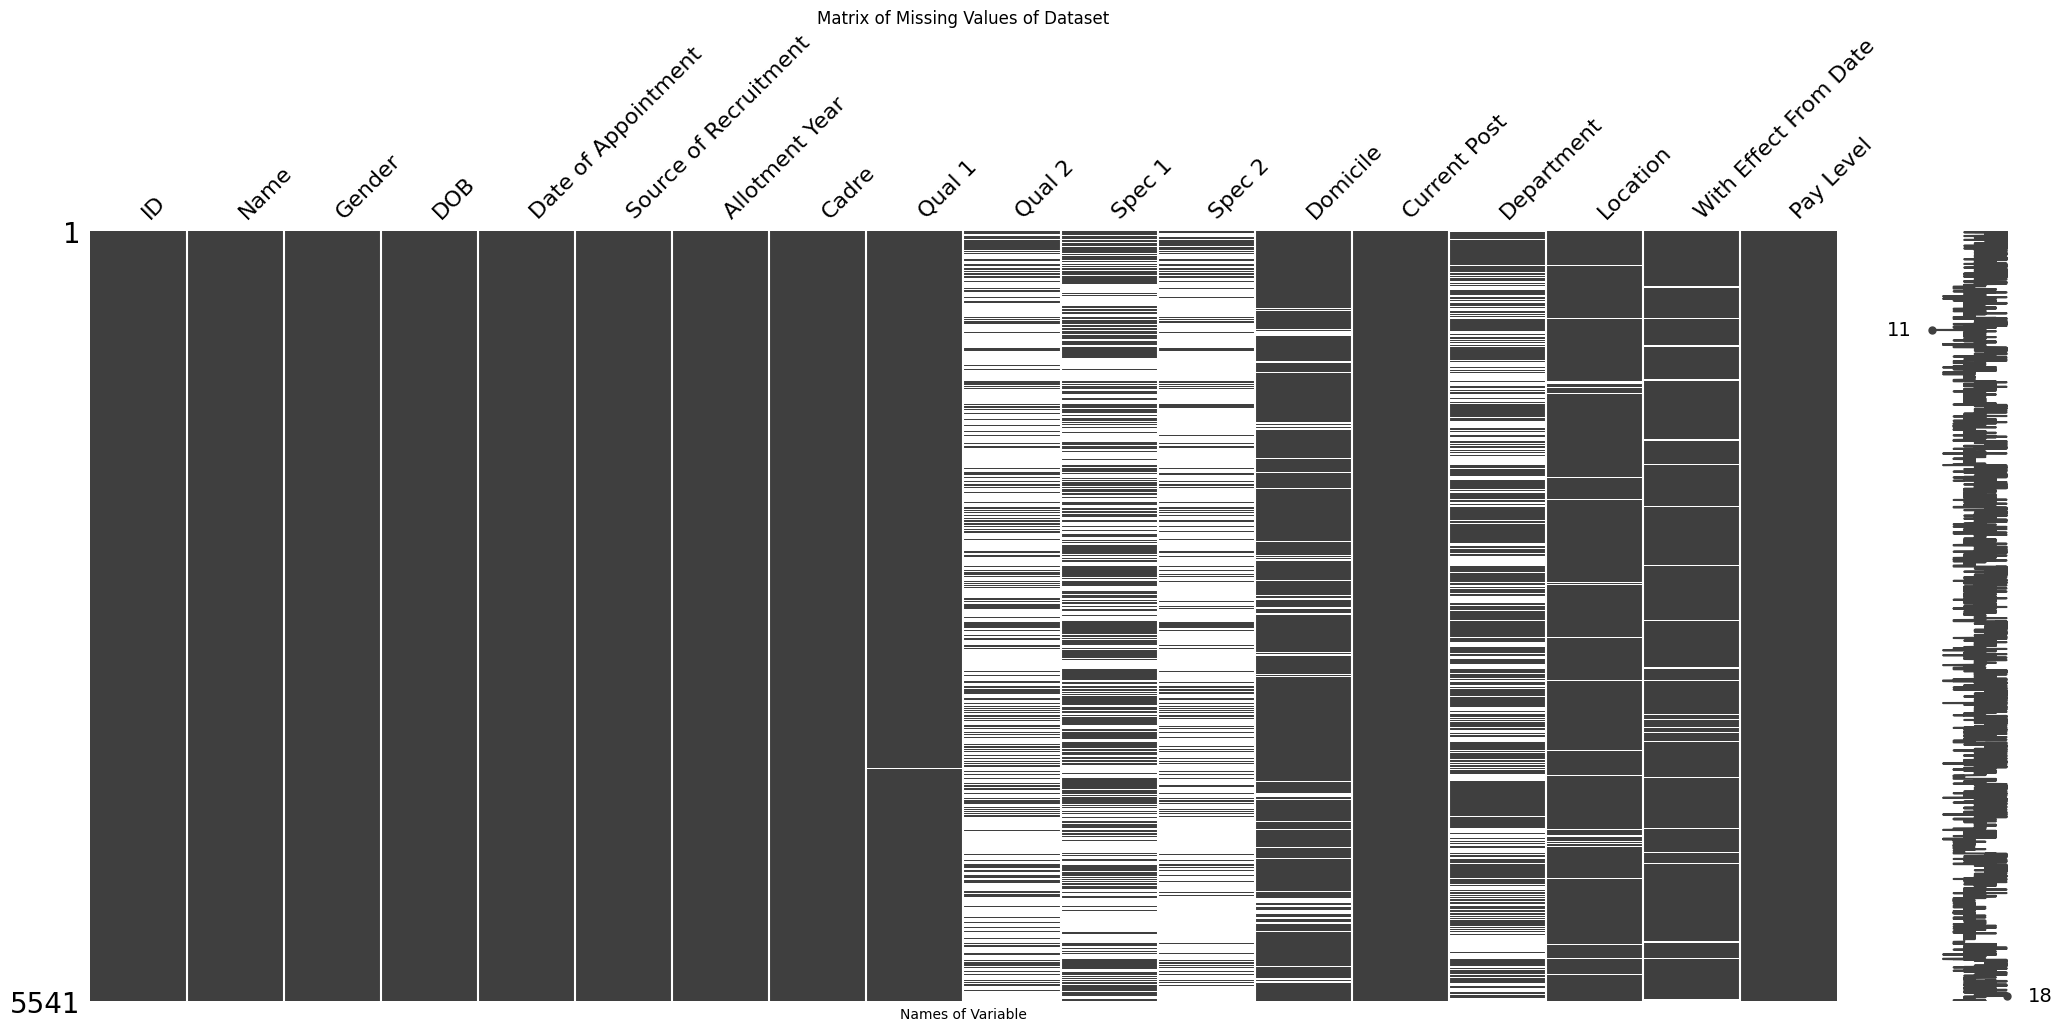

In [49]:
import missingno as msno
msno.matrix(data)
plt.title('Matrix of Missing Values of Dataset')
plt.xlabel('Names of Variable')
plt.show()

Filling null values of each feature

In [50]:
c = data['Qual 2'].isnull()
ind = data[c].index


data.loc[ind, :].head()


,ID,Name,Gender,DOB,Date of Appointment,Source of Recruitment,Allotment Year,Cadre,Qual 1,Qual 2,Spec 1,Spec 2,Domicile,Current Post,Department,Location,With Effect From Date,Pay Level
4,008200,Shri Atal Dulloo,Male,1966-10-24,1989-08-21,RR,1989,UT,B.Tech,NaN,Civil Engg,NaN,Jammu & Kashmir,Chief Secretary,NaN,Jammu & Kashmir,2023-01-12,Level 17
6,019100,Shri Rajendra Kumar,Male,1966-12-16,1989-08-21,RR,1989,UT,B.Tech,NaN,Electrical Engg.,NaN,Bihar,Under Suspension,NaN,NaN,2016-02-10,Level 15
9,019300,Shri Dharmendra,Male,1965-09-17,1989-08-21,RR,1989,UT,B.Tech,NaN,Civil Engg,NaN,Uttar Pradesh,Chief Secretary,Govt of Arunachal Pradesh,Itanagar,2022-04-19,Level 17
11,008300,Shri Raj Kumar Goyal,Male,1965-10-08,1990-08-20,RR,1990,UT,B.E.,NaN,Electronics,NaN,Uttar Pradesh,Secretary,Border Management,New Delhi,2024-03-02,Level 17
13,020000,Ms. Debashree Mukherjee,Female,1968-11-19,1991-09-15,RR,1991,UT,M.A.,NaN,English Lit,NaN,Madhya Pradesh,Secretary,D/o Water Resources,New Delhi,2023-01-10,Level 17


* **Qual 2**  

In [51]:
data['Qual 2'] = data['Qual 2'].fillna("N/A")
data['Qual 2'].value_counts()

N/A                  3781
M.A.                  371
M.B.A.                163
B.A.                  153
LL.B.                 139
B.Sc.                 125
B.E.                  111
B.Tech                102
M.Sc.                  88
M.Tech                 68
M.Phil                 64
PG Diploma             59
Ph.D.                  53
B.Com.                 40
B.Ed.                  36
M.P.A.                 26
P.G.                   24
LL.M.                  15
Diploma                14
M.B.B.S.               13
Chartered Acctt.       11
M.Com.                 10
M.P.M.                 10
B.V.Sc & A.H            9
M.I.D.P.                7
M.E.                    7
Post Doctorate          7
M.D.                    6
M.V.Sc.                 4
ICWAI                   4
M.B.L                   3
Company Secretary       3
Graduate                3
B.H.M.S.                2
M.Ed.                   2
Ph.D.                   1
B.A. LL.B.              1
M.C.A.                  1
B.A.M.S.    

* **Spec 2**

In [52]:
data['Spec 2'] = data['Spec 2'].fillna("N/A")
data['Spec 2'].value_counts()

N/A                   4450
Hons                    80
Economics               75
Public Mgmt             64
Mech. Engg.             47
                      ... 
Quality Management       1
Fibre Sc.&tech.          1
Tourism                  1
Development              1
Safety Engg.             1
Name: Spec 2, Length: 171, dtype: int64

* Spec 1

In [53]:
data['Spec 1'] = data['Spec 1'].fillna("N/A")
data['Spec 1'].value_counts()


N/A                 2558
Mech. Engg.          194
Hons                 190
Electrical Engg.     185
Economics            182
                    ... 
Banking Law            1
Sino-burmese Rl        1
Sahitya Visharad       1
Kannada                1
Thermal Eng.           1
Name: Spec 1, Length: 228, dtype: int64

Imputing null value of Qual 1 with most frequent value

* Qual 1

In [54]:
qual1_mode = data['Qual 1'].mode()[0]
data['Qual 1']  =  data['Qual 1'].fillna(qual1_mode)

print(f'Null Values of Qual 1 filled with most frequent i.e. {qual1_mode}')

Null Values of Qual 1 filled with most frequent i.e. B.Tech


Categorizing Level of Educational Qualification

In [55]:
def get_qual_type(x):

    if x == 'N/A':  return 0
    x = x.strip()

    if x in ['M.B.B.S.', 'B.H.M.S.']:  return 1
    elif x == 'Ph.D.':  return 3
    elif 'M' in x:  return 2
    elif 'P' in x and 'G' in x:  return 2
    else:  return 1


qual1 = data['Qual 1']
qual2 = data['Qual 2']

qual1_type = qual1.apply(get_qual_type)
qual2_type = qual2.apply(get_qual_type)


qual_type = []
for i, j in zip(qual1_type, qual2_type):
    x = max(i, j)
    if x == 1: qual_type.append('Graduate')
    elif x == 2: qual_type.append('Post Graduate')
    elif x == 3: qual_type.append('Doctorate')
    elif x == 0: qual_type.append(np.nan)



* Domicile

In [56]:
data['Domicile'] = data['Domicile'].fillna('N/A')

In [57]:
np.round(data.isnull().mean()*100, 2)

ID                        0.00
Name                      0.00
Gender                    0.00
DOB                       0.00
Date of Appointment       0.00
Source of Recruitment     0.00
Allotment Year            0.00
Cadre                     0.00
Qual 1                    0.00
Qual 2                    0.00
Spec 1                    0.00
Spec 2                    0.00
Domicile                  0.00
Current Post              0.13
Department               37.16
Location                  3.56
With Effect From Date     4.26
Pay Level                 0.00
dtype: float64

Handling missing values of department names with respect to current post

* Secretary

In [58]:

def is_secretary(x):
  if type(x) == str:
    x = x.lower().strip()
    return ('chief secretary' in x) or ('secretary to' in x) or ('adviser' in x) or ('advisor' in x) or ('electoral' in x)
  return False


sec = data['Current Post'].apply(is_secretary)
sec_ind = data[sec].index
data.loc[sec_ind, 'Department'] = 'Secretariat'


data.loc[sec_ind, 'Department'] = np.nan
data.loc[3154, 'Department'] = data.loc[3154, 'Location']
data.loc[3154, 'Location'] = np.nan

data['Location'] = data['Location'].apply(lambda x: x.strip().replace('Govt. of', '').replace('Govt of', '') if type(x) == str else x)



* Suspension or Leave

In [59]:

def is_suspended_left_deputation(x):
  if type(x) == str:
    x = x.lower().strip()
    return ('suspension' in x) or ('leave' in x) or ('deputation' in x)
  return False


suspended = data['Current Post'].apply(is_suspended_left_deputation)
sus_ind = data[suspended].index

data.loc[sus_ind, ['Department', 'Location']] = np.nan

* Training

In [60]:
training = data['Current Post'].apply(lambda x: ('On Training' in x if type(x) == str else False))
waiting = data['Current Post'].apply(lambda x: ('waiting' in x.lower() if type(x) == str else False))
ind = data[training | waiting].index

data.loc[ind, 'Department'] = np.nan

lbsnaa = data['Location'].apply(lambda x: 'LBSNAA ' in x if type(x) == str else False)
ind2 = data[lbsnaa & training].index
data.loc[ind2, 'Current Post'] = data.loc[ind2, 'Current Post'].apply(lambda x: x + ' LBSNAA' )
data.loc[ind2, 'Location'] = data.loc[ind2, 'Location'].apply(lambda x: x.replace('LBSNAA ', ''))


* Current Post (Overall)

In [61]:
null_post = data['Current Post'].isnull()

post_ind = data[null_post].index
data.loc[1880, 'Department'] = data.loc[1880, 'Current Post']
data.loc[1880, 'Department'] = np.nan

data.loc[post_ind, 'Current Post'] = 'N/A'

* Department

In [62]:
null_dept = data['Department'].isnull()
data[null_dept].to_csv('null_dept.csv', index = False)

sec_tr_susp_leave_dept = data[null_dept & ( training | waiting | suspended)].index
other_dept = data[null_dept & ~(training | waiting | suspended)].index

data.loc[other_dept, 'Department'] = 'N.A.'
data.loc[sec_tr_susp_leave_dept, 'Department'] = 'N/A'


Handling Missing Location Values

In [63]:

null_loc = data['Location'].isnull()
loc_not_app = suspended | waiting | null_post

loc_ind1 = data[loc_not_app].index
loc_ind2 = data[null_loc & ~loc_not_app].index


data.loc[loc_ind1, ['Current Post', 'Location']]
data.loc[loc_ind1, 'Location'] = 'N/A'

data.loc[loc_ind2, 'Location'] = 'N.A.'


Classifying Job Status of Officers

In [64]:

data['Qual Type'] = qual_type
data['Age'] = age
data['Service Tenure'] = service_tenure

status1 = training | waiting | suspended
status2 = data['Current Post'] == 'N/A'

ind = data[status1 | status2].index
data['Job Status'] = 'Active'
data.loc[ind, 'Job Status'] = 'Inactive'

data['Current Tenure'] = current_tenure

c = waiting | suspended
ind = data[c].index

data['With Effect From Date'] = data['With Effect From Date'].fillna('N/A')


Imputing Current Tenure

In [65]:

data.loc[ind, 'Current Tenure']  = 'N/A'

c1 = data['Current Tenure'].isnull()
c2 = data['With Effect From Date'] != 'N/A'
c3 = data['Current Post'] == 'N.A.'
c4 = data['Current Post'] == 'N.A.'

ind = data[c1 & c2].index
data.loc[ind, 'Job Status'] = 'Inactive'

ind = data[c1 & (c3 | c4)].index
data.loc[ind, 'Job Status'] = 'Inactive'

data['Current Tenure'] = data['Current Tenure'].fillna('N/A')


Classifying Current Post

In [66]:
def get_current_post(x):

  x = x.lower()

  if 'coll' in x:
    return 'Collector'
  elif 'sec' in x or 'advis' in x:
    return 'Secretary'
  elif 'comm' in x:
    return 'Commissioner'
  elif 'manag' in x:
    return 'Manager'
  elif 'train' in x:
    return 'Trainee'
  elif 'director' in x:
    return 'Director'

  elif 'leave' in x or 'wait' in x or 'suspen' in x:
    return 'Inactive'

  elif 'magistrate' in x:
    return 'Magistrate'
  elif 'officer' in x:
    return 'Officer'

  elif 'chair' in x or 'vc' in x or 'v.c.' in x:
    return 'Chairman'

  else:
    return 'Other'


data['Post Type'] = data['Current Post'].apply(get_current_post)


Classifying Department Names

In [67]:
def get_dept(x):
    x = x.lower()

    if 'home' in x:
        return 'Home Department'
    elif 'agri' in x:
        return 'Agriculture Department'
    elif 'edu' in x:
        return 'Education Department'
    elif 'power' in x or 'energy' in x or 'gas' in x or 'petrol' in x:
        return 'Energy Department'
    elif 'edu' in x:
        return 'Education Department'
    elif 'labour' in x or 'emp' in x or 'skill' in x:
        return 'Labour Department'
    elif 'water' in x:
        return 'Water Department'
    elif 'econom' in x or 'finan' in x or 'reven' in x or 'tax' in x or 'exis' in x:
        return 'Finance Department'
    elif 'dev' in x or 'hous' in x:
        return 'Infrastructure Development Department'
    elif 'health' in x or 'med' in x or 'pharma' in x or 'ayu' in x:
        return 'Health Department'
    elif 'indus' in x or 'commerce' in x or 'ware' in x :
        return 'Commerce Department'
    elif 'zil' in x or 'dist' in x or 'muni' in x or 'mahanagara' in x:
        return 'District Department'
    else:
        return 'Other Department'

data['Department Type'] = data['Department'].apply(get_dept)

ind = data[data['Post Type'] == 'Secretary'].index

data.loc[ind, 'Department Type'] = 'Secretariat Department'

data['Department Type'] = data['Department Type'].fillna('N/A')


Filling Null Values of Current Tenure by the help of Job Status, Post Type (Current Post) and With Effect From Date

In [68]:

c1 = data['Job Status'] == 'Inactive'
c2 = data['Post Type'] == 'Inactive'

inactive = data[c1 & c2]
inactive['With Effect From Date'] = inactive['With Effect From Date'].replace('N/A', np.nan)
inactive

inactive = inactive[inactive['With Effect From Date'].notnull()]
ind = inactive.index

inactive_tenure = np.floor((pd.to_datetime(inactive['With Effect From Date']) -
          pd.to_datetime(inactive['Date of Appointment'])).dt.components.days / 365)

data.loc[ind, 'Current Tenure'] = inactive_tenure

data['Current Tenure'] = data['Current Tenure'].replace('N/A', 0)


After handling null values

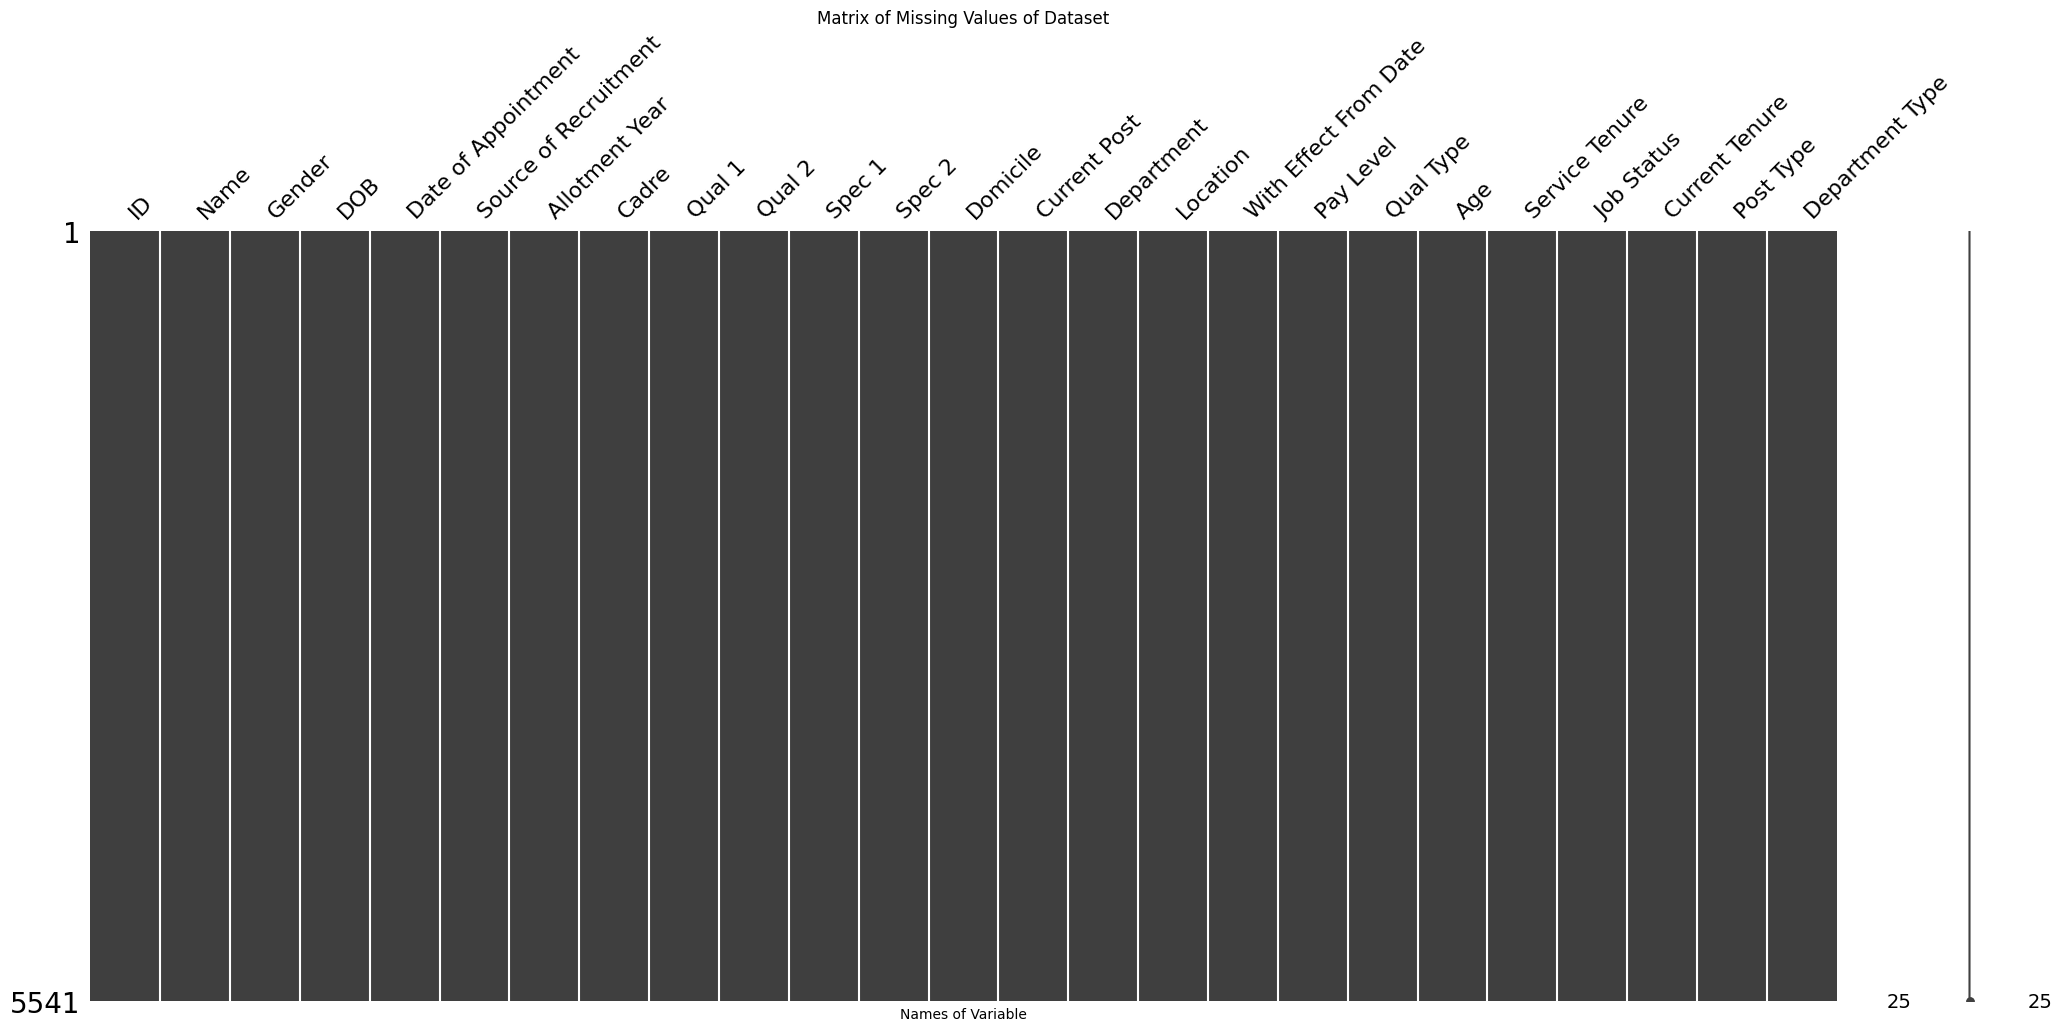

In [69]:

msno.matrix(data)
plt.title('Matrix of Missing Values of Dataset')
plt.xlabel('Names of Variable')
plt.show()

Rearranging columns and saving it in a csv file

In [70]:

data = data.iloc[:, [0, 1, 2, 3, 19, 12, 4, 6, 20, 5, 7, 8, 9, 18, 10, 11, 13, 23, 14, 24, 15, 21, 16, 22, 17]]

data.to_csv('IAS_Cleaned.csv', index=False)

